Pulse-Code-Modulation

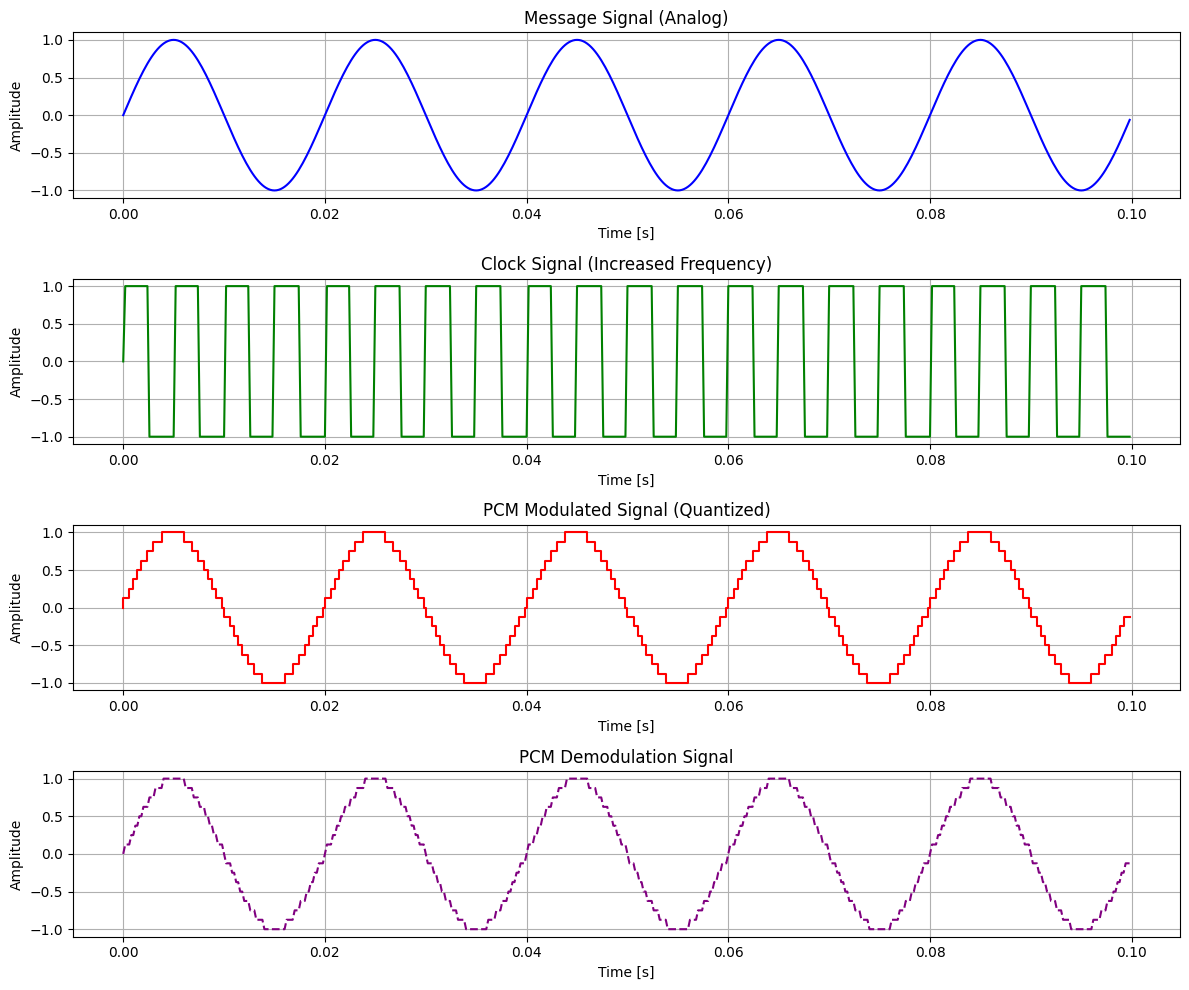

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 5000  # Sampling rate (samples per second)
frequency = 50  # Frequency of the message signal (analog signal)
duration = 0.1  # Duration of the signal in seconds
quantization_levels = 16  # Number of quantization levels (PCM resolution)

# Generate time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate message signal (analog signal)
message_signal = np.sin(2 * np.pi * frequency * t)

# Generate clock signal (sampling clock) with higher frequency than before
clock_signal = np.sign(np.sin(2 * np.pi * 200 * t))  # Increased clock frequency to 200 Hz

# Quantize the message signal
quantization_step = (max(message_signal) - min(message_signal)) / quantization_levels
quantized_signal = np.round(message_signal / quantization_step) * quantization_step

# Simulate the PCM modulated signal (digital representation)
pcm_signal = (quantized_signal - min(quantized_signal)) / quantization_step
pcm_signal = pcm_signal.astype(int)

# Plotting the results
plt.figure(figsize=(12, 10))

# Plot message signal
plt.subplot(4, 1, 1)
plt.plot(t, message_signal, label="Message Signal (Analog)", color='blue')
plt.title("Message Signal (Analog)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot clock signal (higher frequency)
plt.subplot(4, 1, 2)
plt.plot(t, clock_signal, label="Clock Signal (Increased Frequency)", color='green')
plt.title("Clock Signal (Increased Frequency)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot PCM modulated signal (quantized)
plt.subplot(4, 1, 3)
plt.step(t, quantized_signal, label="PCM Modulated Signal", color='red')
plt.title("PCM Modulated Signal (Quantized)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot 'PCM Demodulation'
plt.subplot(4, 1, 4)
plt.plot(t, quantized_signal, label="PCM Demodulation Signal", color='purple', linestyle='--')
plt.title("PCM Demodulation Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

DELTA MODULATION


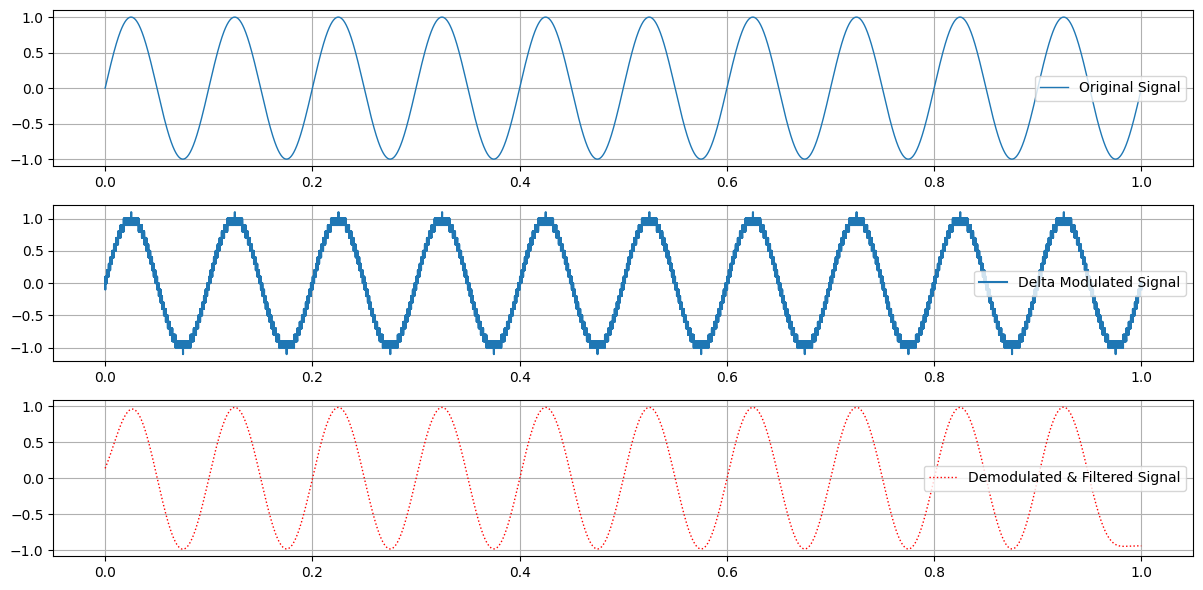

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
# Parameters
fs = 10000  # Sampling frequency
f = 10  # Signal frequency
T = 1  # Duration in seconds
delta = 0.1  # Step size
t = np.arange(0, T, 1/fs)
message_signal = np.sin(2 * np.pi * f * t)  # Sine wave as input signal
# Delta Modulation Encoding
encoded_signal = []
dm_output = [0]  # Initial value of the modulated signal
prev_sample = 0
for sample in message_signal:
    if sample > prev_sample:
        encoded_signal.append(1)
        dm_output.append(prev_sample + delta)
    else:
        encoded_signal.append(0)
        dm_output.append(prev_sample - delta)
    prev_sample = dm_output[-1]
# Delta Demodulation (Reconstruction)
demodulated_signal = [0]
for bit in encoded_signal:
    if bit == 1:
        demodulated_signal.append(demodulated_signal[-1] + delta)
    else:
        demodulated_signal.append(demodulated_signal[-1] - delta)
# Convert to numpy array
demodulated_signal = np.array(demodulated_signal)
# Apply a low-pass Butterworth filter
def low_pass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)
filtered_signal = low_pass_filter(demodulated_signal, cutoff_freq=20, fs=fs)
# Plotting the Results
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, message_signal, label='Original Signal', linewidth=1)
plt.legend()
plt.grid()
plt.subplot(3, 1, 2)
plt.step(t, dm_output[:-1], label='Delta Modulated Signal', where='mid')
plt.legend()
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal[:-1], label='Demodulated & Filtered Signal', linestyle='dotted', linewidth=1, color='r')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()